<a href="https://colab.research.google.com/github/muhamadfadil316/MACHINE-LEARNING/blob/main/PraktikumMandiri06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# menghubungan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum06"

In [ ]:
# Import library umum
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/praktikum_ml/praktikum06/data/social.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df["Purchased"].unique()

array([0, 1])

In [ ]:
X = df[['Gender', 'Age', 'EstimatedSalary']]

#kolom target
y = df['Purchased']

In [ ]:
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [ ]:
y.head()

#(0 = tidak beli, 1 = beli)

,Purchased
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Cek kolom yang bertipe object (string)
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
#akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 85.00%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        52
           1       0.83      0.71      0.77        28

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80




Confusion Matrix:
 [[48  4]
 [ 8 20]]


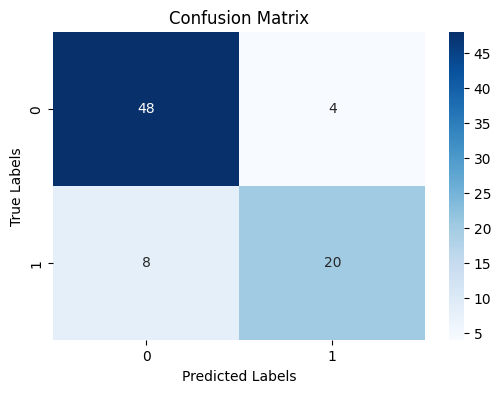

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

#jika kita tau nama kelas (opsional, agar lebih informatif)
#misalnya: class_names = ['Negatif', 'Positif']
#maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

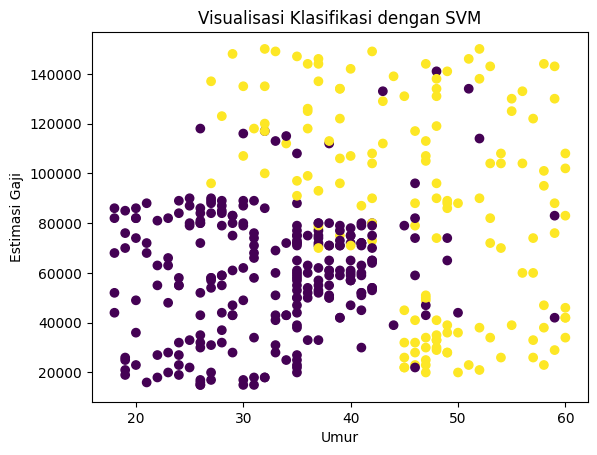

In [ ]:
import matplotlib.pyplot as pls

plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'].astype('category').cat.codes)
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.title('Visualisasi Klasifikasi dengan SVM')
plt.show()

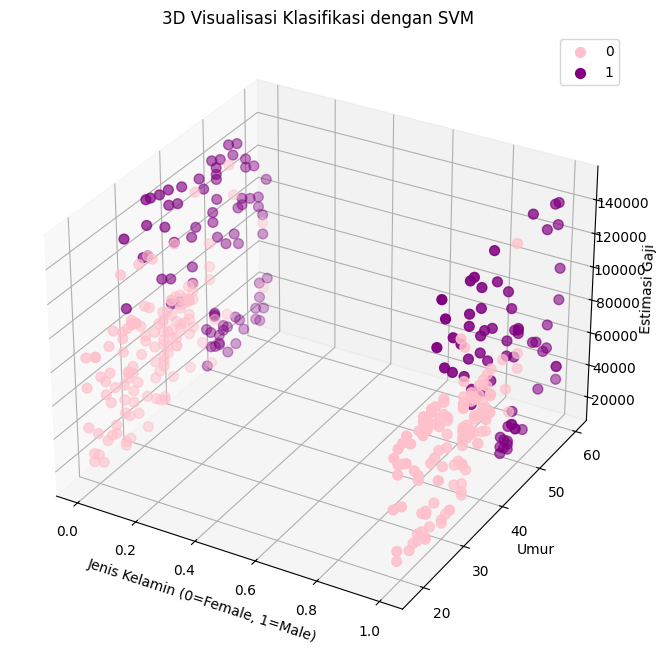

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

#Encode kolom Gender (karena masih berupa teks)
le_gender = LabelEncoder()
df['GenderEncoded'] = le_gender.fit_transform(df['Gender'])  # Female=0, Male=1

#Encode kolom Purchased (target)
le_purchased = LabelEncoder()
df['PurchasedEncoded'] = le_purchased.fit_transform(df['Purchased'])  # 0=Tidak beli, 1=Beli

#Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Warna untuk tiap kelas target
colors = ['pink', 'purple']
labels = le_purchased.classes_

#Plot tiap kelas target dengan warna berbeda
for i, label in enumerate(labels):
    subset = df[df['PurchasedEncoded'] == i]
    ax.scatter(
        subset['GenderEncoded'],      # sumbu X
        subset['Age'],                # sumbu Y
        subset['EstimatedSalary'],    # sumbu Z
        color=colors[i],
        label=f"{label}",
        s=50
    )

ax.set_xlabel('Jenis Kelamin (0=Female, 1=Male)')
ax.set_ylabel('Umur')
ax.set_zlabel('Estimasi Gaji')
ax.set_title('3D Visualisasi Klasifikasi dengan SVM')
ax.legend()
plt.show()
